In [609]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from mycolorpy import colorlist as mcp
import matplotlib.ticker as ticker

In [2]:
dates=pd.date_range(start='2020-11-08 00:00:00', end='2021-01-27 14:00:00',freq='1H')
dates_url = dates.strftime('%Y%m%d_%H%M%S')
columns=['Date','Rank','Nat/Sail','Skipper/Crew','Hour FR','Latitude','Longitude','Heading_30min (degree)','Speed_30min (kts)','VMG_30min (kts)','Distance_30min (nm)','Heading_lrt (degree)','Speed_lrt (kts)','VMG_lrt (kts)','Distance_lrt (nm)','Heading_24h (degree)','Speed_24h (kts)','VMG_24h (kts)','Distance_24h (nm)','DTF (nm)','DTL (nm)']
df_read = pd.DataFrame()
for idx,value in enumerate(dates_url):
    
    url="https://www.vendeeglobe.org/download-race-data/vendeeglobe_"+value+".xlsx"
    try:
        csv=pd.read_excel(url,skiprows=4,names=columns,skipfooter=4)
        csv['Date']=dates[idx]
        df_read = df_read.append(csv, ignore_index=True)
    except:
        continue

In [98]:
df_read.to_csv('vendeeglobe_race_date.csv',index=False)

In [534]:
df=pd.read_csv('vendeeglobe_race_date.csv')

In [535]:
#df.head(10)

In [536]:
#df['Skipper']=df['Skipper/Crew'].apply(lambda x: x.split('\n')[0])
#df['Crew']=df['Skipper/Crew'].apply(lambda x: x.split('\n')[1])

In [537]:
df[['Skipper','Crew']]=df['Skipper/Crew'].str.extract('(.*)\n(.*)')
df['Sail']=df['Nat/Sail'].str.extract('(\d+)')
df['Nat']=df['Nat/Sail'].apply(lambda x: x.split('\n')[1].split(' ')[0])

In [538]:
df['Rank'].loc[df['Rank']=='NL']="34"
df['Rank'].loc[df['Rank']=='RET']="35"

In [539]:
#df['Rank'].unique()

In [540]:
#Fill nan values for NL Sails at the starting date 

change_columns=['Hour FR','Latitude','Longitude','Heading_30min (degree)','Speed_30min (kts)','VMG_30min (kts)','Distance_30min (nm)','Heading_lrt (degree)','Speed_lrt (kts)','VMG_lrt (kts)','Distance_lrt (nm)','Heading_24h (degree)','Speed_24h (kts)','VMG_24h (kts)','Distance_24h (nm)','DTF (nm)','DTL (nm)']
df.loc[(df['Rank']=='34')&(df['Date']=="2020-11-08 14:00:00"),change_columns]=df.loc[0,change_columns].values

In [541]:
#Sort by date and sail to fillna backward
df = df.sort_values(by=['Sail','Date'], ascending=(True,False))
df=df.fillna(method='bfill')


In [542]:
df.loc[0,['Sail','Longitude']].values

array(['18', "01°50.48'W"], dtype=object)

In [543]:
def degreeToDec(string):
    direction=string[-1]
    sec=int(string.split(".")[1].split("'")[0])
    mins=int(string.split(".")[0].split("°")[1])
    degree=int(string.split("°")[0])
    dec = degree + (mins/60) + (sec/3600)
    if direction=='S'or direction=='W':
        dec=(-dec)
    return dec

In [544]:
a="46°24.46'S"
g=degreeToDec(a)
type(g)

float

In [545]:
df['Latitude']=df['Latitude'].apply(lambda x: degreeToDec(x))
df['Longitude']=df['Longitude'].apply(lambda x: degreeToDec(x))

In [546]:
clean_columns=['Heading_30min (degree)','Speed_30min (kts)','VMG_30min (kts)','Distance_30min (nm)','Heading_lrt (degree)','Speed_lrt (kts)','VMG_lrt (kts)','Distance_lrt (nm)','Heading_24h (degree)','Speed_24h (kts)','VMG_24h (kts)','Distance_24h (nm)','DTF (nm)','DTL (nm)']
df[clean_columns]=df[clean_columns].apply(lambda x: x.str.replace('[^\d+\.\d+]', ''))

In [547]:
df_clean=df[['Date', 'Rank','Nat','Sail','Skipper','Crew','Latitude','Longitude','Heading_30min (degree)','Speed_30min (kts)','VMG_30min (kts)','Distance_30min (nm)','Heading_lrt (degree)','Speed_lrt (kts)','VMG_lrt (kts)','Distance_lrt (nm)','Heading_24h (degree)','Speed_24h (kts)','VMG_24h (kts)','Distance_24h (nm)','DTF (nm)','DTL (nm)']]

In [548]:
df_clean=df_clean.astype(dtype={'Rank':int,'Nat':str,'Sail':int,'Skipper':str,'Crew':str,'Latitude':float,'Longitude':float,'Heading_30min (degree)':int,'Speed_30min (kts)':float,'VMG_30min (kts)':float,'Distance_30min (nm)':float,'Heading_lrt (degree)':int,'Speed_lrt (kts)':float,'VMG_lrt (kts)':float,'Distance_lrt (nm)':float,'Heading_24h (degree)':int,'Speed_24h (kts)':float,'VMG_24h (kts)':float,'Distance_24h (nm)':float,'DTF (nm)':float,'DTL (nm)':float})

In [549]:
df_clean = df_clean.sort_values(by=['Date','Rank'], ascending=(False,True))
df_clean['Date']=pd.to_datetime(df_clean['Date'])
df_clean.set_index('Date',inplace=True)

In [550]:
df_clean.head()

,Rank,Nat,Sail,Skipper,Crew,Latitude,Longitude,Heading_30min (degree),Speed_30min (kts),VMG_30min (kts),...,Heading_lrt (degree),Speed_lrt (kts),VMG_lrt (kts),Distance_lrt (nm),Heading_24h (degree),Speed_24h (kts),VMG_24h (kts),Distance_24h (nm),DTF (nm),DTL (nm)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-27 14:00:00,1,FRA,79,Charlie Dalin,APIVIA,46.235278,-3.700278,39,21.0,16.0,...,37,19.1,17.4,57.2,61,13.9,13.9,334.3,80.5,0.0
2021-01-27 14:00:00,2,FRA,18,Louis Burton,Bureau Vallée 2,46.417222,-5.208333,116,17.8,15.6,...,110,17.7,16.9,53.3,100,17.2,16.9,412.1,141.5,60.9
2021-01-27 14:00:00,3,MON,10,Boris Herrmann,Seaexplorer - Yacht Club De Monaco,44.529444,-5.348611,130,18.2,3.4,...,113,16.6,10.3,49.9,84,13.5,12.9,323.5,190.0,109.5
2021-01-27 14:00:00,4,FRA,59,Thomas Ruyant,LinkedOut,47.411667,-7.368889,103,17.6,17.5,...,102,17.6,17.6,52.9,93,18.1,18.0,433.4,235.8,155.3
2021-01-27 14:00:00,5,FRA,17,Yannick Bestaven,Maître Coq IV,47.727222,-7.989167,98,18.4,18.3,...,98,18.1,18.1,54.4,91,18.6,18.6,447.2,264.3,183.7


In [551]:
tes=df_clean[df_clean.index=='2021-01-27 14:00:00'].sort_values(by='DTF (nm)', ascending=True)
tes

,Rank,Nat,Sail,Skipper,Crew,Latitude,Longitude,Heading_30min (degree),Speed_30min (kts),VMG_30min (kts),...,Heading_lrt (degree),Speed_lrt (kts),VMG_lrt (kts),Distance_lrt (nm),Heading_24h (degree),Speed_24h (kts),VMG_24h (kts),Distance_24h (nm),DTF (nm),DTL (nm)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-27 14:00:00,1,FRA,79,Charlie Dalin,APIVIA,46.235278,-3.700278,39,21.0,16.0,...,37,19.1,17.4,57.2,61,13.9,13.9,334.3,80.5,0.0
2021-01-27 14:00:00,2,FRA,18,Louis Burton,Bureau Vallée 2,46.417222,-5.208333,116,17.8,15.6,...,110,17.7,16.9,53.3,100,17.2,16.9,412.1,141.5,60.9
2021-01-27 14:00:00,3,MON,10,Boris Herrmann,Seaexplorer - Yacht Club De Monaco,44.529444,-5.348611,130,18.2,3.4,...,113,16.6,10.3,49.9,84,13.5,12.9,323.5,190.0,109.5
2021-01-27 14:00:00,4,FRA,59,Thomas Ruyant,LinkedOut,47.411667,-7.368889,103,17.6,17.5,...,102,17.6,17.6,52.9,93,18.1,18.0,433.4,235.8,155.3
2021-01-27 14:00:00,5,FRA,17,Yannick Bestaven,Maître Coq IV,47.727222,-7.989167,98,18.4,18.3,...,98,18.1,18.1,54.4,91,18.6,18.6,447.2,264.3,183.7
2021-01-27 14:00:00,6,FRA,1000,Damien Seguin,Groupe APICIL,45.836944,-10.358611,72,17.0,16.8,...,74,17.0,16.9,51.0,79,16.6,16.5,397.9,358.2,277.7
2021-01-27 14:00:00,7,ITA,34,Giancarlo Pedote,Prysmian Group,46.591111,-10.905000,77,21.3,21.0,...,77,20.7,20.5,62.1,77,18.8,18.8,451.1,376.7,296.2
2021-01-27 14:00:00,8,FRA,1,Jean Le Cam,Yes we Cam !,44.708889,-13.708611,70,18.1,18.0,...,68,19.0,18.9,57.0,59,17.1,17.1,410.4,511.6,431.1
2021-01-27 14:00:00,9,FRA,9,Benjamin Dutreux,OMIA - Water Family,43.523889,-17.380278,58,17.7,17.4,...,66,16.0,16.0,47.9,54,16.7,16.6,399.7,684.3,603.7


In [770]:
my_cmap=mcp.gen_color(cmap="gist_ncar",n=nbSails)
sails=df_clean['Skipper'].unique()
color_dict = dict(zip(sails, my_cmap))

In [771]:
def draw_barchart(date):
    tes=df_clean[df_clean.index==date].sort_values(by='DTF (nm)', ascending=True)
    ax.clear()
    tes = tes[::-1]   # flip values from top to bottom
    ax.barh(tes['Skipper'], df_clean['DTF (nm)'].max()-tes['DTF (nm)'],color=[color_dict[x] for x in tes['Skipper']])
    dx = tes['DTF (nm)'].max() / 200
    for i, (value, name) in enumerate(zip(tes['DTF (nm)'], tes['Skipper'])):
        ax.text(df_clean['DTF (nm)'].max()-value, i-.25, name, size=10, ha='right', va='baseline')
        ax.text(df_clean['DTF (nm)'].max()-value, i,"{:.2f}".format(df_clean['DTF (nm)'].max()-value),  size=9, ha='left',  va='center')

    ax.text(0, 1.06, 'Nautic Miles', transform=ax.transAxes, size=12, color='#9c9b98')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#9c9b98', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Race position from miles traveled',
            transform=ax.transAxes, size=24, weight=600, ha='left')

    plt.box(False)

In [772]:
bar_dates=pd.date_range(start='2020-11-09 14:00:00', end='2020-11-14 14:00:00',freq='24H')

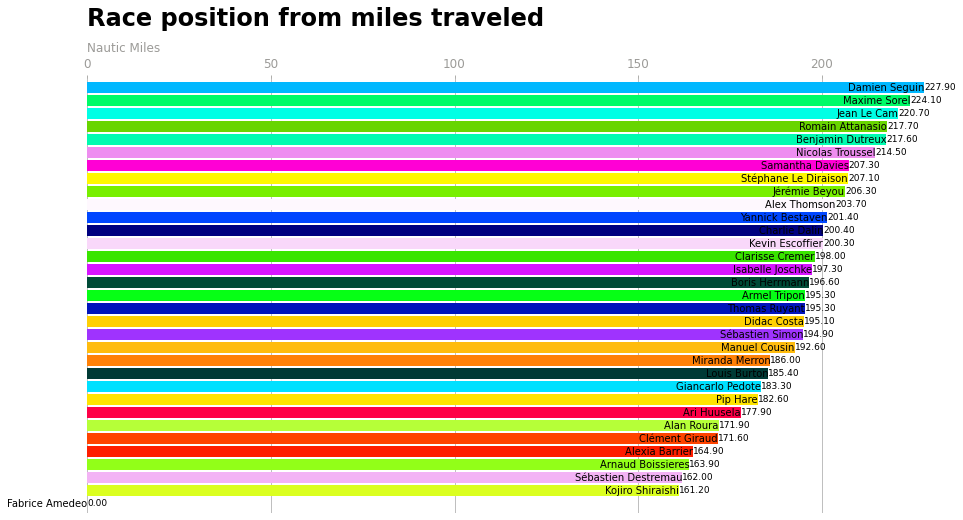

In [775]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))
animator=animation.FuncAnimation(fig, draw_barchart, frames=bar_dates)
HTML(animator.to_jshtml())